## Import Required Libraries

In [2]:
# common libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import helper 
import sklearn
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries    

# preprocessing libraries, split data, gid search configuration, cross validation
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

# visualization libraries
import pydotplus    
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import itertools

## Load Data

In [3]:
# read csv file
data = pd.read_csv('../data/final_merged_data.csv') 

print('Shape of dataframe prior to modeling:', data.shape)
display(data.head())

Shape of dataframe prior to modeling: (1269, 417)


,patdeid,rsa_week_0,rsa_week_1,rsa_week_2,rsa_week_3,rsa_week_4,rsa_week_5,rsa_week_6,rsa_week_7,rsa_week_8,...,medication,weeks_attended,cows_predose,cows_postdose,rbs_contaminated_use,rbs_n_heroin_injection,rbs_heroin_daily_injection,rbs_heroin_non_iv_use,rbs_speedball,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,27,11,6,0.0,30.0,3.0,0.0,0.0,1.0
1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,27,8,1,0.0,30.0,3.0,0.0,0.0,0.0
2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,27,8,5,0.0,30.0,4.0,0.0,0.0,1.0
3,4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,27,11,9,0.0,30.0,3.0,0.0,1.0,0.0
4,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,11,6,0.0,0.0,0.0,4.0,0.0,0.0


## Review Tests

In [4]:
test_names = [
 #'propoxyphene',
 #'amphetamines',
 #'cannabinoids',
 #'benzodiazepines',
 #'mmethadone',
 'oxycodone',
 'cocaine',
 'methamphetamine',
 'opiate300'
 ]

# define prefix parameter and call helper function to build the dataset
prefix = 'test_'
tests = helper.feature_selection(data, prefix, test_names)


Shape of tests DataFrame: (1269, 20)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,test_methamphetamine_2,test_opiate300_2,test_oxycodone_3,test_cocaine_3,test_methamphetamine_3,test_opiate300_3,test_oxycodone_4,test_cocaine_4,test_methamphetamine_4,test_opiate300_4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Review Surveys


In [5]:
# comment out the drugs you don't want to include
survey_names = [
#'cannabis',
'cocaine',
#'alcohol',
'oxycodone',
#'mmethadone',
#'amphetamine',
'methamphetamine',
'opiates',
#'benzodiazepines'
]

# call helper function to build  the dataset
prefix = 'survey_'
surveys = helper.feature_selection(data, prefix, survey_names)

Shape of tests DataFrame: (1269, 8)


,survey_cocaine_0,survey_oxycodone_0,survey_methamphetamine_0,survey_opiates_0,survey_cocaine_4,survey_oxycodone_4,survey_methamphetamine_4,survey_opiates_4
0,0.0,0.0,0.0,30.0,0.0,0.0,2.0,0.0
1,0.0,0.0,0.0,30.0,0.0,0.0,0.0,5.0
2,23.0,0.0,0.0,30.0,9.0,0.0,0.0,9.0
3,2.0,1.0,0.0,30.0,1.0,0.0,0.0,6.0
4,0.0,25.0,0.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1264,2.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
1265,11.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
1266,0.0,8.0,0.0,20.0,0.0,0.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create Dataframe for Baseline Numeric Predictors

In [6]:
# medication data, binary
#meds = data[['medication']]

meds = data[[col for col in data.columns if 'meds_' in col]].iloc[:, :10]

# clinical opiate withdrawal scale -  included for assessment
cows = data[[col for col in data.columns if 'cows' in col]]

# rbs - risk behavior survey data
#rbs = data[[col for col in data.columns if 'rbs' in col]]

# combine all the dataframes
num_df = pd.concat([tests, surveys, meds, cows], axis=1)
print('Shape of numeric dataframe after feature selection:', num_df.shape)
display(num_df)

Shape of numeric dataframe after feature selection: (1269, 40)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,cows_predose,cows_postdose
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,0.0,46.0,0.0,27.0,0.0,55.0,11,6
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,7.0,0.0,7.0,0.0,9.0,0.0,7.0,8,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,24.0,0.0,44.0,0.0,60.0,0.0,51.0,0.0,8,5
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,22.0,0.0,27.0,0.0,23.0,0.0,9.0,11,9
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,8
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,10
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,6
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,5


## Review Categorical Data

In [7]:
# demographic features
dem = data[['gender']]

# physical exam
#pex = data[[col for col in data.columns if 'pex' in col]]

# combine all the dataframes
cat_df = pd.concat([dem], axis=1)

print('shape of the categorical df:', cat_df.shape)
display(cat_df)

shape of the categorical df: (1269, 1)


,gender
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1264,0.0
1265,1.0
1266,0.0
1267,0.0


## Assign Target Variable and Merge

In [8]:
# assigne dropout variable
dropout = data['dropout']

# merge
new_data = pd.concat([num_df, cat_df, dropout], axis=1)

print('Shape of new datframe:',new_data.shape)
display(new_data)


Shape of new datframe: (1269, 42)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,cows_predose,cows_postdose,gender,dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46.0,0.0,27.0,0.0,55.0,11,6,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,7.0,0.0,9.0,0.0,7.0,8,1,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,44.0,0.0,60.0,0.0,51.0,0.0,8,5,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,27.0,0.0,23.0,0.0,9.0,11,9,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11,8,0.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26,10,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,6,0.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12,5,0.0,1.0


In [8]:
# save to CSV in data directory for ML pipelines
new_data.to_csv('../data/42_features.csv', index=False)

## The next cells allow to test the data for accuracy using decision trees

In [10]:
# preprocess the cat dataframe
cat_df = pd.get_dummies(cat_df, drop_first=True, dtype=int)

# merge the dataframes
new_data_preprocessed = pd.concat([num_df, cat_df, dropout], axis=1)

print('Shape of new datframe:',new_data_preprocessed.shape)

Shape of new datframe: (1269, 42)


## Split the Data to Dev and Test sets

In [11]:

# assign variables
X, y = new_data_preprocessed.drop('dropout', axis=1), new_data_preprocessed['dropout']

# create the dev and test sets 
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

# create the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.16, random_state=42)

# check the shape of the train, validation, and test sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (916, 41)
Shape of X_val: (175, 41)
Shape of X_test: (178, 41)


## Review Patient Profile

In [ ]:

X_train.iloc[21, :]

## Fit A Decision Tree
No hyperparameter tuning

In [12]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Measure the Train and Test with C-Index

In [13]:
y_train_preds = dt.predict_proba(X_train)[:, 1]
print(f"Train C-Index: {helper.cindex(y_train.values, y_train_preds)}")

y_val_preds = dt.predict_proba(X_val)[:, 1]
print(f"Val C-Index: {helper.cindex(y_val.values, y_val_preds)}")

Train C-Index: 1.0
Val C-Index: 0.6671052631578948


## Update Hyperparams

In [14]:
# Update hyperparam configuration
dt_hyperparams = {
    'criterion': 'gini', 
    'max_depth': 3, 
    'max_features': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2
    }

## Let's test the accuracy on a regularlized tree

In [15]:
dt_reg = DecisionTreeClassifier(**dt_hyperparams, random_state=10)
dt_reg.fit(X_train, y_train)

y_train_preds = dt_reg.predict_proba(X_train)[:, 1]
y_val_preds = dt_reg.predict_proba(X_val)[:, 1]
print(f"Train C-Index: {helper.cindex(y_train.values, y_train_preds)}")
print(f"Val C-Index (expected > 0.6): {helper.cindex(y_val.values, y_val_preds)}")

Train C-Index: 0.8090738146861869
Val C-Index (expected > 0.6): 0.8296052631578947


## See how the data fits the tree

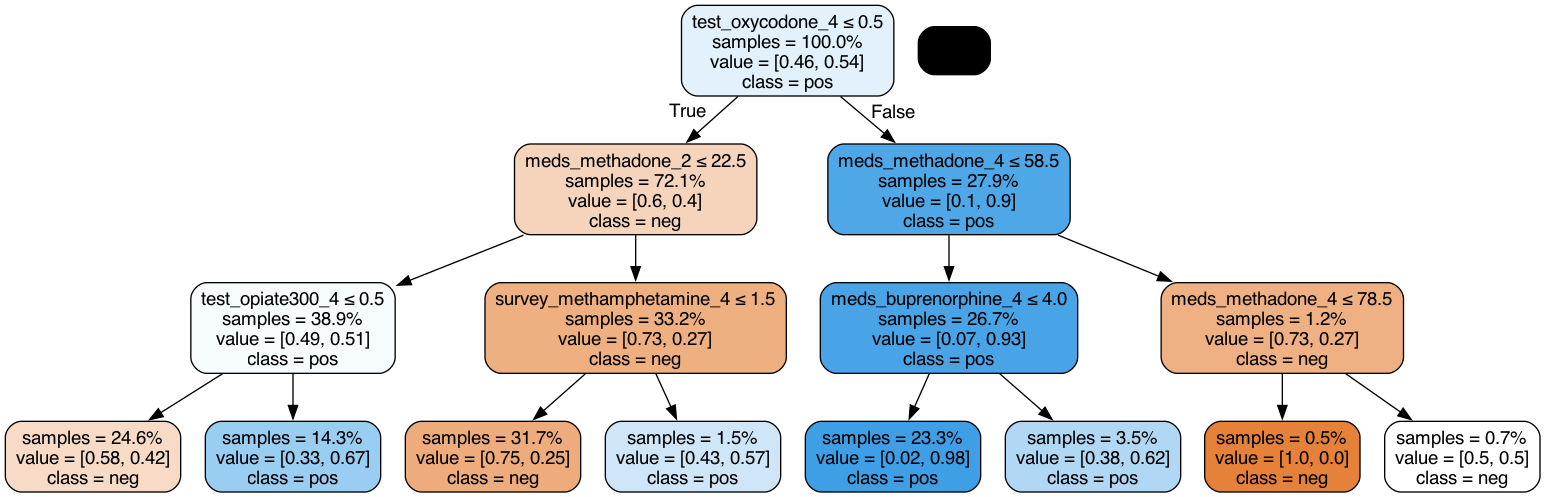

In [16]:
dot_data = StringIO()
export_graphviz(dt_reg, feature_names=X_train.columns, out_file=dot_data,  
                filled=True, rounded=True, proportion=True, special_characters=True,
                impurity=False, class_names=['neg', 'pos'], precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Save the new Data Model for ML Pipelines

In [ ]:
# save data to csv
new_data.to_csv('../data/39_features.csv', index=False)